In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as rd
from torch import nn

In [10]:
rd.random()

0.22809543478662087

In [11]:
env = gym.make('CartPole-v1', render_mode = 'rgb_array')

In [12]:
import math
def obs2idx(x): 
    return tuple((1/(1+np.exp(-x))*100).astype(np.int64))

In [13]:
Q = np.random.uniform(low=0, high=1, size=([100,100,100,100] + [env.action_space.n]))
Q.shape

(100, 100, 100, 100, 2)

In [14]:
import time 
from IPython import display

scoreList = []
epochs = 60000
d_factor = 0.95
lr = 0.5
epsilon = 1
epsilon_decay_value = 0.99995
epsilon_arr = []
prior_reward = 0

for epoch in range(epochs): # 0 left 1 down 2 right 3 up     
    observation = env.reset()
    observation = observation[0]
    
    done = False
    t = 0
    n_reward = 0
    if (epoch+1) % 10000 == 0:
        print('epoch',epoch,'eps',epsilon)

    while not done:
        obsidx = obs2idx(observation)
        if (epoch + 1) % 10000 == 0:
            screen = env.render()
        # if (epoch + 1) % 10000 == 0:
        #     display.clear_output(wait=True)
        #     display.display(plt.gcf())
        #     plt.title(str(epoch) + " " + str(t))
        #     plt.imshow(screen)
        
        if np.random.random() > epsilon:
            action = np.argmax(Q[obsidx])
        else:
            action = np.random.randint(0, env.action_space.n)
        # print(env.step(action))
        new_observation, reward, done, info,_ = env.step(action)
        newobsidx = obs2idx(new_observation)
        n_reward += reward
        Q[(obsidx) + (action,)] = (1-lr)*Q[obsidx + (action,)]+lr*(reward + d_factor * np.max(Q[newobsidx]))
        observation = new_observation
        t += 1
    

    if epsilon > 0.05: 
        if n_reward > prior_reward and epoch > 10000:
            epsilon = math.pow(epsilon_decay_value, epoch - 10000)

    prior_reward = n_reward
    scoreList.append(t)
    epsilon_arr.append(epsilon)
plt.close()
env.close()

c:\Users\dkstn\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


epoch 9999 eps 1
epoch 19999 eps 0.6065837347310917
epoch 29999 eps 0.36790703377745504
epoch 39999 eps 0.22314410649822441
epoch 49999 eps 0.1353420502827641
epoch 59999 eps 0.08210449657107814


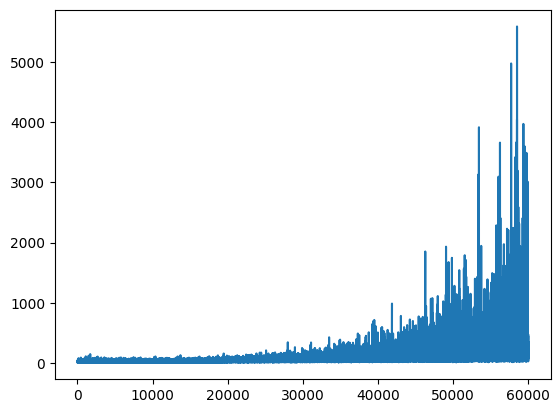

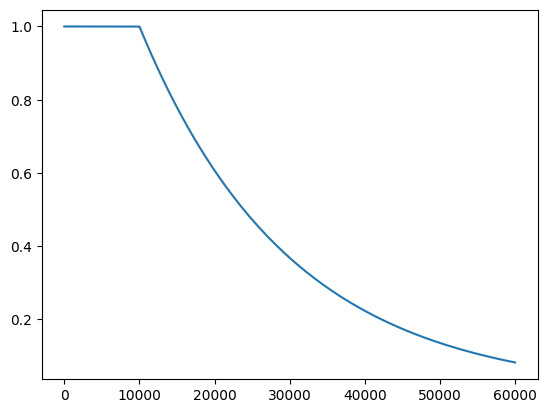

In [15]:
plt.plot(range(len(scoreList)),scoreList)
plt.show()
plt.plot(range(len(epsilon_arr)),epsilon_arr)
plt.show()